# TP 2

## Exercice 2.1

matplotlib can be used to plot graphs. Given below is a very simple code with only x values. After importing the matplotlib library, we initialize x values and plot it.

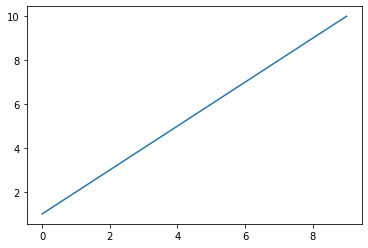

In [2]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x)
plot.show()

Now let's change the color, style and width of the line.

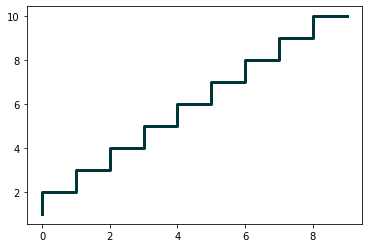

In [3]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

We will now initialize the y-values and plot the graph.

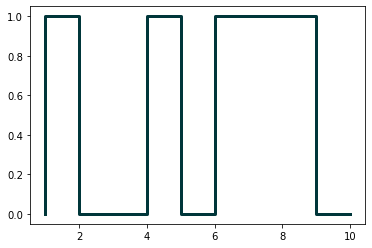

In [4]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
plot.plot(x, y, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

In the first practical session, we saw how to parse JSON files. Continuing with the same JSON file, we will now plot the results of number of programming languages released per year. Verify the output.

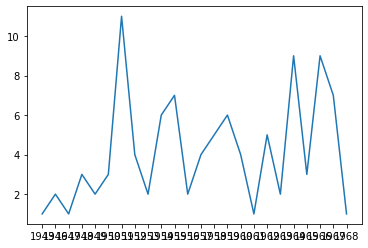

In [8]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open('pl.json'))
dataframe = pd.json_normalize(data)
grouped = dataframe.groupby('year').count()
plot.plot(grouped)
plot.show()

Following program will add title and labels to the x-axis and y-axis.

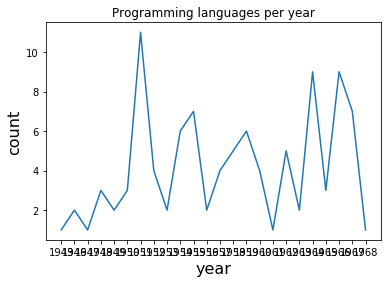

In [10]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open('pl.json'))
dataframe = pd.json_normalize(data)
grouped = dataframe.groupby('year').count()
plot.plot(grouped)
plot.title("Programming languages per year")
plot.xlabel('year', fontsize=16)
plot.ylabel('count', fontsize=16)
plot.show()

There is yet another way to plot the dataframes, by using pandas.DataFrame.plot.

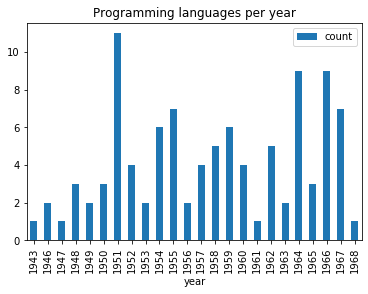

In [12]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open('pl.json'))
dataframe = pd.json_normalize(data)

grouped = dataframe.groupby('year').count()
grouped = grouped.rename(columns={'languageLabel':'count'}).reset_index()

grouped.plot(x=0, kind='bar', title="Programming languages per year")

Now, we want to create multiple subplots. A simple way is given below. Recall in first practical session, we did group by on multiple columns. Subplots can be used to visualize these data.

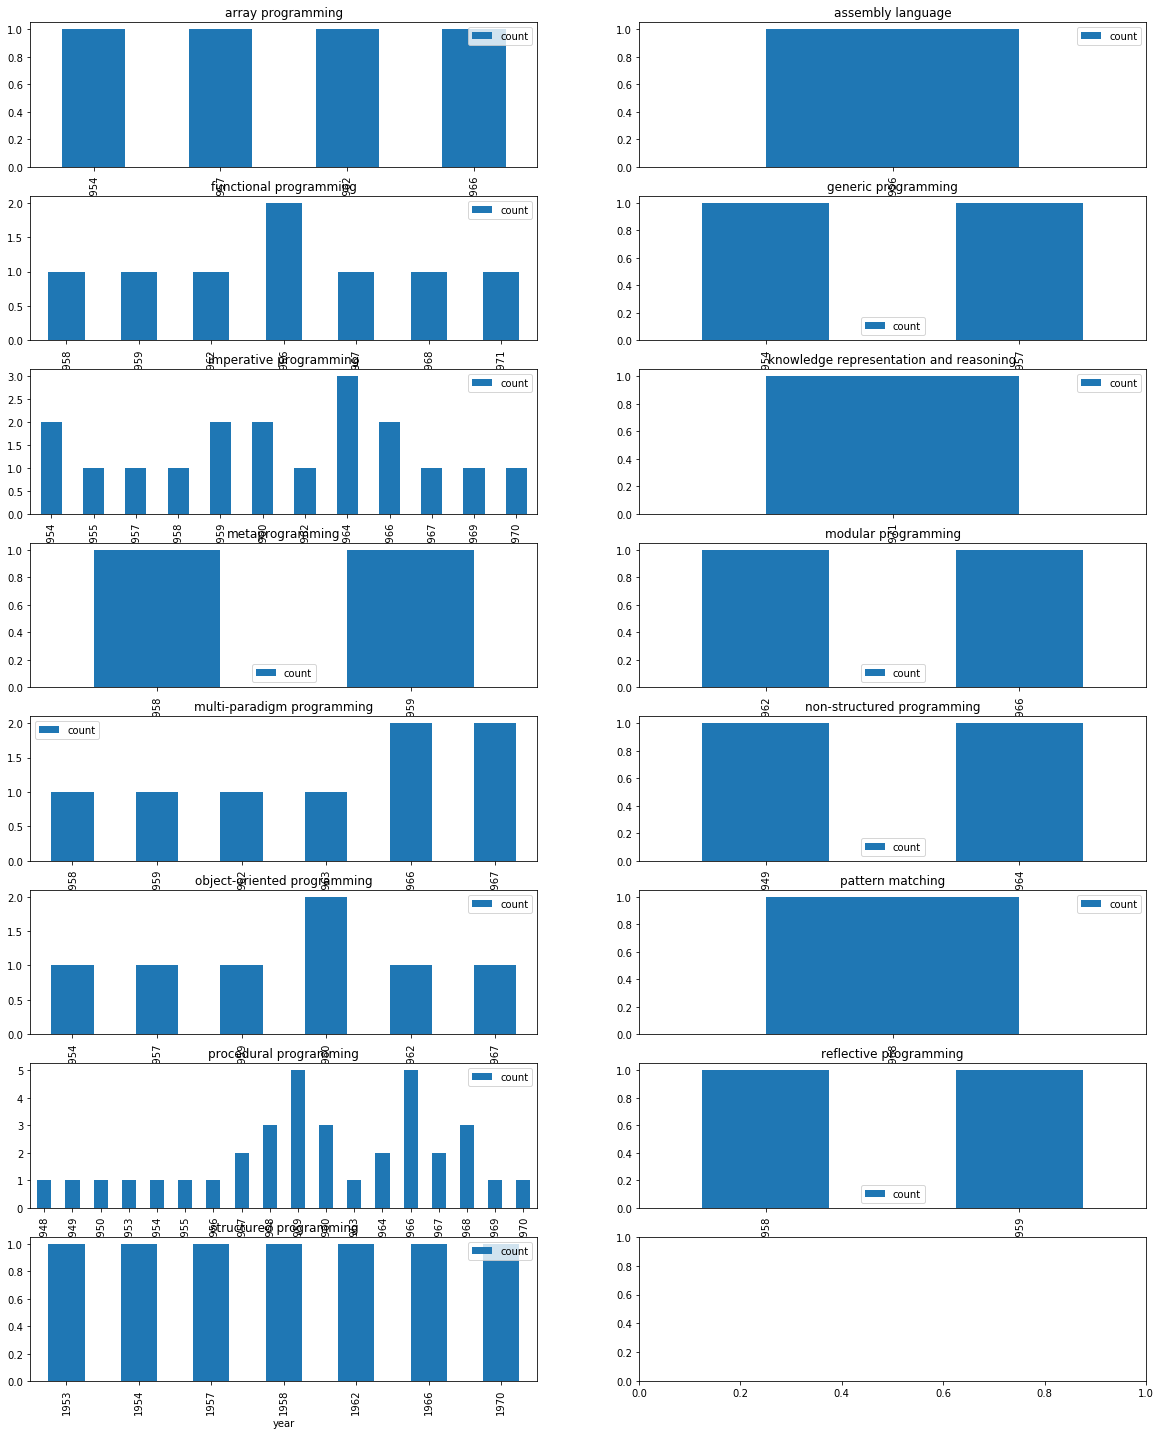

In [15]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

jsondata = json.load(open('plparadigm.json'))
array = []

for data in jsondata:
    array.append([data['year'], data['languageLabel'], data['paradigmLabel']])

dataframe = pd.DataFrame(array, columns=['year', 'languageLabel', 'paradigmLabel'])
dataframe = dataframe.astype(dtype= {"year" : "int64", "languageLabel" : "<U200", "paradigmLabel" : "<U200"})

grouped = dataframe.groupby(['paradigmLabel', 'year']).count()
grouped = grouped.rename(columns={'languageLabel':'count'})
grouped = grouped.groupby(['paradigmLabel'])

#Initialization of subplots
nr = math.ceil(grouped.ngroups/2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20,25))

#Creation of subplots
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    g.plot(x='year', y='count', kind='bar', title=group, ax=axes[math.floor(i/2),i%2])

plot.show()

Make changes to the above code, so that we can get visual information on count of different programming paradigms released in every available year.

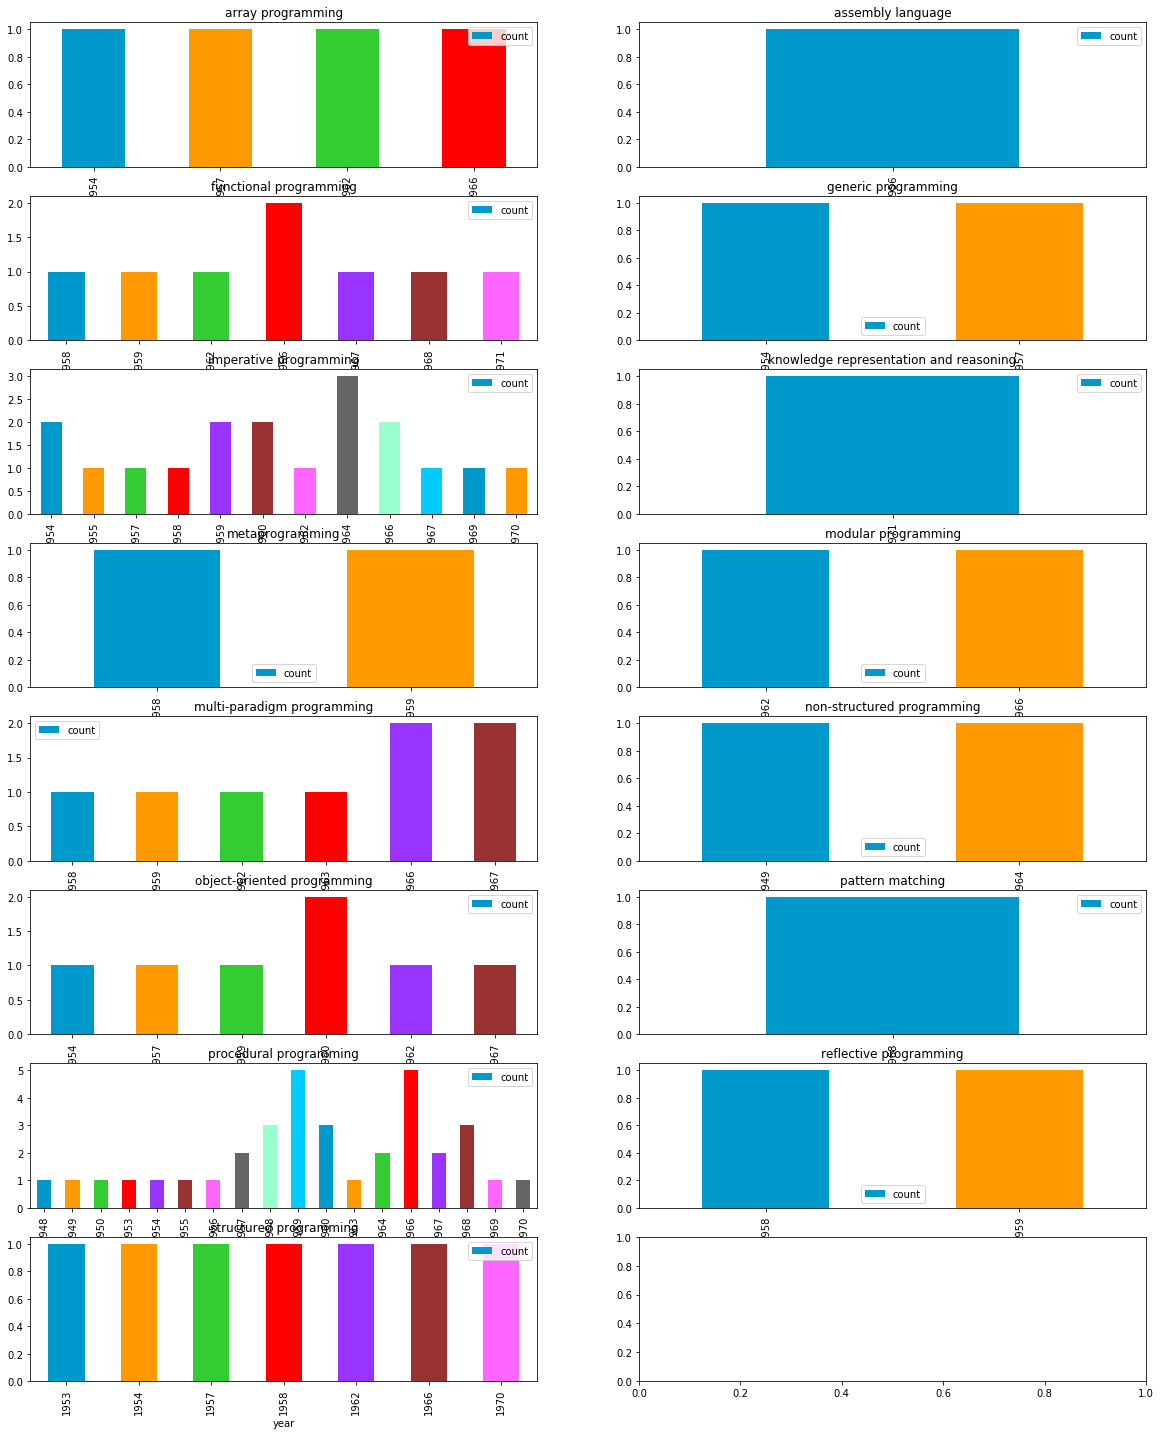

In [19]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

jsondata = json.load(open('plparadigm.json'))
array = []

for data in jsondata:
    array.append([data['year'], data['languageLabel'], data['paradigmLabel']])

dataframe = pd.DataFrame(array, columns=['year', 'languageLabel', 'paradigmLabel'])
dataframe = dataframe.astype(dtype= {"year" : "int64", "languageLabel" : "<U200", "paradigmLabel" : "<U200"})

grouped = dataframe.groupby(['paradigmLabel', 'year']).count()
grouped = grouped.rename(columns={'languageLabel':'count'})
grouped = grouped.groupby(['paradigmLabel'])

#Initialization of subplots
nr = math.ceil(grouped.ngroups/2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20,25))

#Creation of subplots
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    colors = ['#0099cc', '#ff9900', '#33cc33', '#ff0000', '#9933ff', '#993333', '#ff66ff', '#666666', '#99ffcc', '#00ccff']
    g.plot(x='year', y='count', kind='bar', title=group, ax=axes[math.floor(i/2),i%2], color=colors)

plot.show()

## Exercise 2.2

In this exercise, we will work on images. Download an image (e.g., picture.bmp and flower.jpg) in your current working folder and open it in the following manner. We will first try to get some metadata of the image.

In [24]:
import os,sys
from PIL import Image
imgfile = Image.open("picture.bmp")
print(imgfile.size, imgfile.format)

(640, 480) BMP


We use Image module of Python PIL library (Documentation). We will now try to get data of 100 pixels from an image.

In [25]:
import os,sys
from PIL import Image
imgfile = Image.open("flower.jpg")

data = imgfile.getdata()

for i in range(10):
    for j in range(10):
        print(i,j, data.getpixel((i,j)))

0 0 (102, 94, 105)
0 1 (77, 69, 82)
0 2 (77, 70, 86)
0 3 (75, 71, 86)
0 4 (75, 71, 86)
0 5 (77, 71, 85)
0 6 (78, 70, 83)
0 7 (80, 70, 81)
0 8 (78, 70, 83)
0 9 (80, 69, 83)
1 0 (78, 70, 83)
1 1 (53, 45, 58)
1 2 (53, 46, 62)
1 3 (50, 46, 61)
1 4 (53, 46, 62)
1 5 (52, 46, 60)
1 6 (53, 45, 58)
1 7 (55, 45, 56)
1 8 (55, 44, 58)
1 9 (54, 43, 57)
2 0 (76, 70, 82)
2 1 (53, 45, 60)
2 2 (53, 45, 60)
2 3 (52, 46, 60)
2 4 (53, 47, 61)
2 5 (54, 46, 59)
2 6 (55, 44, 58)
2 7 (56, 44, 58)
2 8 (54, 44, 55)
2 9 (54, 42, 54)
3 0 (78, 72, 86)
3 1 (55, 47, 62)
3 2 (56, 48, 63)
3 3 (55, 47, 60)
3 4 (56, 48, 61)
3 5 (57, 46, 60)
3 6 (56, 45, 59)
3 7 (56, 44, 58)
3 8 (54, 42, 54)
3 9 (53, 41, 53)
4 0 (80, 74, 86)
4 1 (57, 49, 62)
4 2 (57, 49, 60)
4 3 (57, 49, 60)
4 4 (59, 49, 60)
4 5 (57, 47, 56)
4 6 (56, 44, 54)
4 7 (56, 43, 53)
4 8 (54, 41, 51)
4 9 (52, 39, 49)
5 0 (82, 76, 90)
5 1 (59, 51, 64)
5 2 (61, 50, 64)
5 3 (59, 49, 60)
5 4 (58, 48, 57)
5 5 (57, 45, 55)
5 6 (55, 43, 53)
5 7 (54, 41, 51)
5 8 (53, 40,

You may notice the pixel position and pixel values (a tuple of 3 values). Let's try to get additional metadata of the images, i.e., mode of image (e.g., RGB), number of bands, number of bits for each band, width and height of image (in pixels).

In [27]:
import os,sys
from PIL import Image
imgfile = Image.open("flower.jpg")

print(imgfile.mode, imgfile.bits, imgfile.width, imgfile.height)

RGB 8 640 480


Let's now get an histogram of colors. When you execute the following code, you will get a single array of values, frequency of each band (R, G, B etc.) concatenated together. In the following code, we will assume that we are working with an image of 3 bands (RGB mode) and each band is represented by 8 bits. We will plot the histogram of different colors.

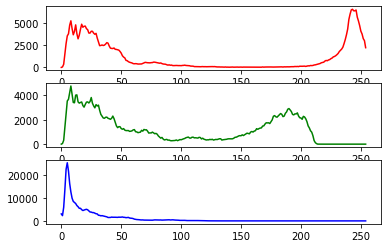

In [28]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("flower.jpg")

histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

fig, (axis1, axis2, axis3) = plot.subplots(nrows=3, ncols=1)
axis1.plot(red, color='red')
axis2.plot(green, color='green')
axis3.plot(blue, color='blue')
plot.show()

But if wish to see all of them in one single plot.

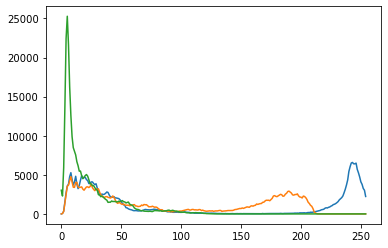

In [29]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("flower.jpg")

histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

x=range(255)

y = []
for i in x:
    y.append((red[i],green[i],blue[i]))

plot.plot(x,y)
plot.show()

But we do not wish to loose the band colors.

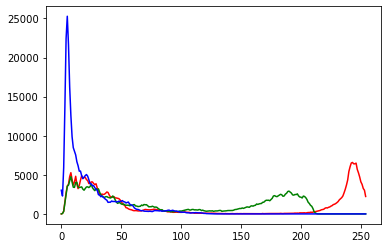

In [30]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("flower.jpg")

histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

x=range(255)

y = []
for i in x:
    y.append((red[i],green[i],blue[i]))

figure, axes = plot.subplots()
axes.set_prop_cycle('color', ['red', 'green', 'blue'])
plot.plot(x,y)
plot.show()

Your next question is to get the top 20 colors in each band and create a single plot of histogram of these top colors. Write a python program that can achieve this.

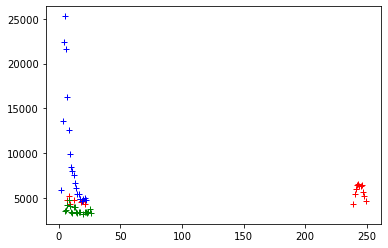

In [188]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("flower.jpg")
histogram = imgfile.histogram()

red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

redTop = sorted(red,reverse=True)[:20]
greenTop = sorted(green,reverse=True)[:20]
blueTop = sorted(blue,reverse=True)[:20]

redY = []
redX = []
greenY = []
greenX = []
blueY = []
blueX = []

for i in range (255):
    if(red[i] in redTop):
        redY.append(red[i])
        redX.append(i)
    if(green[i] in greenTop):
        greenY.append(green[i])
        greenX.append(i)
    if(blue[i] in blueTop):
        blueY.append(blue[i])
        blueX.append(i)

figure, axes = plot.subplots()

#plot.plot(red,redY,color='red')
#plot.plot(green,greenY,color='green')
#plot.plot(blue,blueY,color='blue')

for i in range (20):
    plot.plot(redX[i], redY[i], '+', color='red')
    plot.plot(greenX[i], greenY[i], '+', color='green')
    plot.plot(blueX[i], blueY[i], '+', color='blue')
    
plot.show()

## Exercise 2.3

In this exercise, we will take a look at KMeans clustering algorithm. Continuing with images, we will now find 4 predominant colors in an image.

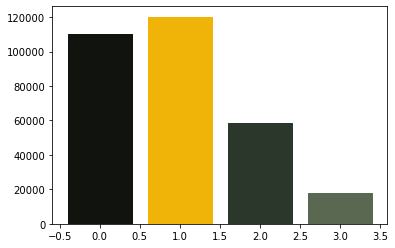

In [69]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("flower.jpg")

numarray = numpy.array(imgfile.getdata(), numpy.uint8)

clusters = KMeans(n_clusters = 4)
clusters.fit(numarray)


npbins = numpy.arange(0, 5)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)


barlist = plot.bar(labels, histogram[0])
for i in range(4):
    barlist[i].set_color('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[i][0]),
        math.ceil(clusters.cluster_centers_[i][1]), math.ceil(clusters.cluster_centers_[i][2])))
plot.show()

For your next question, your goal is to understand the above code and achieve the following:

1. Assume that the number of clusters is given by the user, generalize the above code.
2. In case of bar chart, ensure that the bars are arranged in the descending order of the frequency of colors.
3. Also add support for pie chart in addition to the bar chart. Ensure that we use the image colors as the wedge colors. (e.g., given below)

How many clusters? 4
Bars or Pie chart? (B/p) p


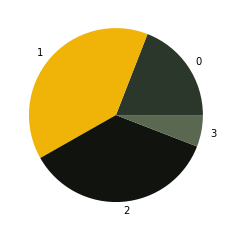

In [117]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("flower.jpg")

numarray = numpy.array(imgfile.getdata(), numpy.uint8)

nbClusters = input("How many clusters? ")
typeClusters = input("Bars or Pie chart? (B/p) ")

clusters = KMeans(n_clusters = int(nbClusters))
clusters.fit(numarray)

npbins = numpy.arange(0, int(nbClusters)+1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)

if(typeClusters.lower() == 'p'):
    colors = []
    for i in range(int(nbClusters)):
        colors.append('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]), math.ceil(clusters.cluster_centers_[i][2])))
    pie = plot.pie(histogram[0],labels=labels,colors=colors)
    
else:

    barlist = plot.bar(labels, sorted(histogram[0],reverse=True))
    for i in range(int(nbClusters)):
        barlist[i].set_color('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]), math.ceil(clusters.cluster_centers_[i][2])))
    
    
plot.show()

## Exercice 2.4

In this exercise, we will explore Support vector machines (SVM) for classification. We will now use colors. Given a RGB number, we want to classify a number into reddish and non-reddish colors.

In [116]:
from sklearn import svm
x = [[186, 0, 13], [255, 121, 97], [244, 67, 54],[69, 39, 160],[121, 83, 210],[0, 51, 0],[27, 94, 32]]
y = [1,1,1,0,0,0,0]
clf = svm.SVC()
clf.fit(x, y)

print(clf.predict([[186, 0, 13]]))
print(clf.predict([[30, 136, 229]]))

[1]
[0]


Look at the training data (x,y). We first use the data to train our classifier. Then we try to predict a new color. We first try with one element of our training data and later with a new color.

Your next goal is to achieve multi-class classification.

1. Train a classifier that can classify three colors: reddish, bluish and greenish colors.
2. Test your classifier with new colors.
3. What are your observations?

In [150]:
from sklearn import svm

#rgb
x = [[186, 0, 13], [255, 121, 97], [244, 67, 54],[69, 39, 160],[121, 83, 210],[0, 51, 0],[27, 94, 32],[255, 0, 0],[0, 255, 0],[0, 0, 255]]

y = [0,0,0,2,2,1,1,0,1,2]

clf = svm.SVC()
clf.fit(x, y)

testColors = [[186, 0, 13],[244, 100, 130],[47, 20, 0],[24, 120, 103],[255, 44, 13],
              [0, 14, 130],[144, 144, 255],[50, 50, 50],[0, 0, 13],[0, 20, 40]]

for i in range (len(testColors)):
    print(testColors[i],end=" ")
    
    prediction = clf.predict([testColors[i]])

    if(prediction == 0):
        color = 'reddish'
    elif(prediction == 1):
        color = 'greenish'
    elif(prediction == 2):
        color = 'bluish'
    else:
        color = 'unknown'
    print(color)
print()

[186, 0, 13] reddish
[244, 100, 130] reddish
[47, 20, 0] greenish
[24, 120, 103] greenish
[255, 44, 13] reddish
[0, 14, 130] bluish
[144, 144, 255] bluish
[50, 50, 50] greenish
[0, 0, 13] greenish
[0, 20, 40] greenish



Needs a lot of data to work correctly.

The more there is, the more it is accurate

## Exercise 2.5: Project

### Project: Image recommender system: 3 practical sessions
The goal of this project is to recommend images based on the color preferences of the user. We will build this system in three practical sessions.

We have to collect the following data.

#### 1. A set of images and the predominant colors in each image

In [198]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

images = []
predColors = []

imgfile1 = Image.open("flower.jpg")
imgfile2 = Image.open("garfled.jpg")
imgfile3 = Image.open("squidguy.jpg")

images.append(imgfile1)
images.append(imgfile2)
images.append(imgfile3)

for i in range (len(images)):
    numarray = numpy.array(images[i].getdata(), numpy.uint8)
    clusters = KMeans(n_clusters = 1)
    clusters.fit(numarray)
    predColors.append('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[0][0]),
            math.ceil(clusters.cluster_centers_[0][1]), math.ceil(clusters.cluster_centers_[0][2])))

for i in range (len(images)):
    print(str(i) + ": " + str(predColors[i]))

0: #725e15
1: #99712f
2: #3b5370


### 2. Ask the user to select some images. We assume that the chosen images contain the favourite colors of the user.

In [206]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

images = []
predColors = []

done = False
    
while not done:
    imgName = input("Image name or end? ")
    
    if(imgName.lower() == "end"):
        done = True
    else:
        images.append(Image.open(imgName))
    
for i in range (len(images)):
    numarray = numpy.array(images[i].getdata(), numpy.uint8)
    clusters = KMeans(n_clusters = 1)
    clusters.fit(numarray)
    predColors.append('#%02x%02x%02x' % (math.ceil(clusters.cluster_centers_[0][0]),
            math.ceil(clusters.cluster_centers_[0][1]), math.ceil(clusters.cluster_centers_[0][2])))

for i in range (len(images)):
    print(str(i) + ": " + str(predColors[i]))


Image name? flower.jpg
Image name? garfled.jpg
Image name? end
0: #725e15
1: #99712f


### 3. We analyse user color-preferences and predominant colors of available images to propose new images to the user.